In [1]:
import pandas as pd

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/dd7ba8142321c2c8aaa0ddd6c8862fcc/raw/e694a9b43bae4d52b6c990a5654a193c3f870750/precos.csv")
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [2]:
dados["km_por_ano"] = dados["milhas_por_ano"] * 1.60934
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,21801,2000,30941.02,1,35085.22134
1,7843,1998,40557.96,1,12622.05362
2,7109,2006,89627.50,0,11440.79806
3,26823,2015,95276.14,0,43167.32682
4,7935,2014,117384.68,1,12770.11290


In [3]:
from datetime import datetime

dados["idade"] = datetime.today().year - dados["ano_do_modelo"]
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano,idade
0,21801,2000,30941.02,1,35085.22134,25
1,7843,1998,40557.96,1,12622.05362,27
2,7109,2006,89627.50,0,11440.79806,19
3,26823,2015,95276.14,0,43167.32682,10
4,7935,2014,117384.68,1,12770.11290,11


In [4]:
dados.drop(["milhas_por_ano", "ano_do_modelo"], axis=1, inplace=True)
dados.head()

,preco,vendido,km_por_ano,idade
0,30941.02,1,35085.22134,25
1,40557.96,1,12622.05362,27
2,89627.50,0,11440.79806,19
3,95276.14,0,43167.32682,10
4,117384.68,1,12770.11290,11


In [9]:
X = dados[["preco", "idade", "km_por_ano"]]
y = dados["vendido"]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

SEED = 54

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(X, y, random_state = SEED, test_size = 0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


data_col1 = teste_x[:, 0]
data_col2 = teste_x[:, 1]

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f'Acurácia: {acuracia:.2f}%')

Acurácia: 77.92%


In [17]:
# Porcentagem de vendidos
vendidos = len(dados.query("vendido == True")) / len(dados) * 100
print(f"Porcentagem de carros vendidos: {vendidos:.2f}%")

Porcentagem de carros vendidos: 58.00%


In [21]:
# DummyClassifier
from sklearn.dummy import DummyClassifier

classificador = DummyClassifier()
classificador.fit(treino_x, treino_y)

previsoes = classificador.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do dummy foi de {acuracia:.2f}%")

A acurácia do dummy foi de 58.00%


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

SEED = 54

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(X, y, random_state = SEED, test_size = 0.25, stratify=y)

#scaler = StandardScaler()
#scaler.fit(raw_treino_x)

#treino_x = scaler.transform(raw_treino_x)
#teste_x = scaler.transform(raw_teste_x)
treino_x = raw_treino_x
teste_x = raw_teste_x

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f'Acurácia: {acuracia:.2f}%')

Acurácia: 79.56%


In [39]:
from sklearn.tree import export_graphviz
import graphviz

estrutura = export_graphviz(modelo, filled=True,
                            rounded=True,
                            feature_names=x.columns,
                            class_names=["não", "sim"],
                            )
grafico = graphviz.Source(estrutura)

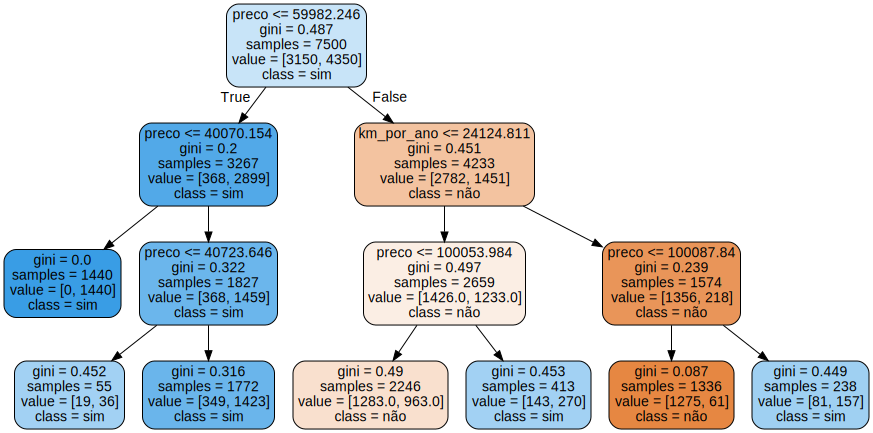

In [40]:
grafico